$500mA$时$B=$
霍尔元件尺寸:$300\times100\times3\mu m$

第一部分：激励电流$I_M=500mA$

第三部分：工作电流$I=4.00mA$

第五部分：工作电流$I=4.00mA$，激励电流$I_M=500mA$

为计算迁移率，再测一组：

$I=4.00mA$，$I_M=500mA$，$U_1=92.0mV$，$U_2=-91.7mV$，$U_3=88.9mV$，$U_4=-88.5mV$，工作电流正向方向电压$U=3.005V$

第四部分：为测$R_0$，先空载，电流$I_{CD}=1.50mA$，电压$U=0.5274V$。

$I_M=500mA$时，$B=127.1mT$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

$U_H = K_H IB$

0.12133399678403782
22.514285714285716
177.13836124536363


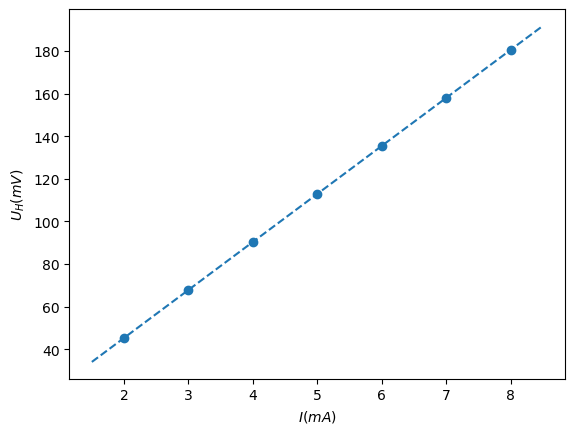

In [2]:
part1 = pd.read_csv('part1.csv')

uh = 0.25*(part1['U1'] - part1['U2'] + part1['U3'] - part1['U4'])
current = part1['I']

res = stats.linregress(current, uh)
xAxis = np.linspace(1.5,8.5)
yAxis = xAxis * res.slope + res.intercept
print(res.intercept_stderr)
fig1, ax = plt.subplots()
ax.scatter(current, uh)
ax.plot(xAxis, yAxis, '--')
ax.set_xlabel('$I(mA)$')
ax.set_ylabel('$U_H(mV)$')
plt.savefig('part1.pdf')
kh = res.slope / 0.1271
print(res.slope)
print(kh)

0.000253338973130986
0.00029712934369352517


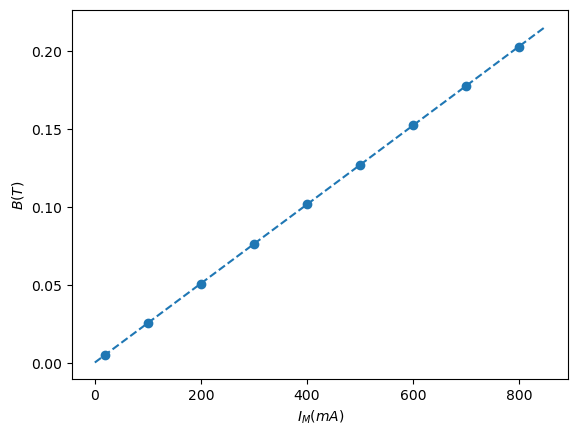

In [3]:
part3 = pd.read_csv('part3.csv')

uh = 0.25*(part3['U1'] - part3['U2'] + part3['U3'] - part3['U4'])
current = 4
im = part3['Im']
b = uh / (kh*current)
fig2, ax =plt.subplots()
ax.scatter(im,b)
res = stats.linregress(im, b)
xAxis = np.linspace(0,850)
yAxis = xAxis * res.slope + res.intercept
imb = res.slope
print(res.slope)
print(res.intercept)
ax.plot(xAxis, yAxis, '--')
ax.set_xlabel('$I_M(mA)$')
ax.set_ylabel('$B(T)$')
plt.savefig('part3.pdf')

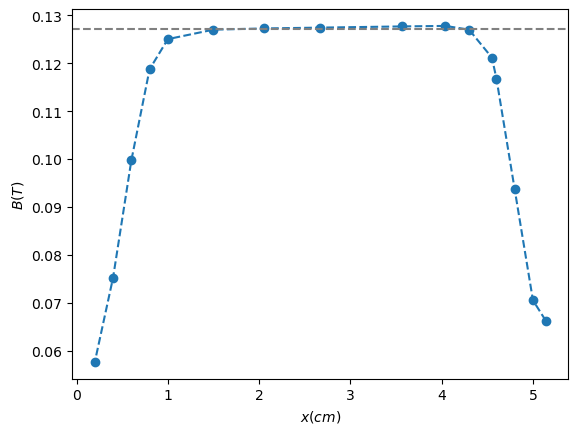

In [4]:
part5 = pd.read_csv('part5.csv')
x = part5['x']
uh = 0.25*(part5['U1'] - part5['U2'] + part5['U3'] - part5['U4'])
current = 4
b = uh / (kh*current)
fig3, ax=plt.subplots()
ax.scatter(x, b)
ax.plot(x, b, '--')
ax.set_xlabel('$x(cm)$')
ax.set_ylabel('$B(T)$')
ax.axhline(0.1271, c='grey', ls='--')
plt.savefig('part5.pdf')

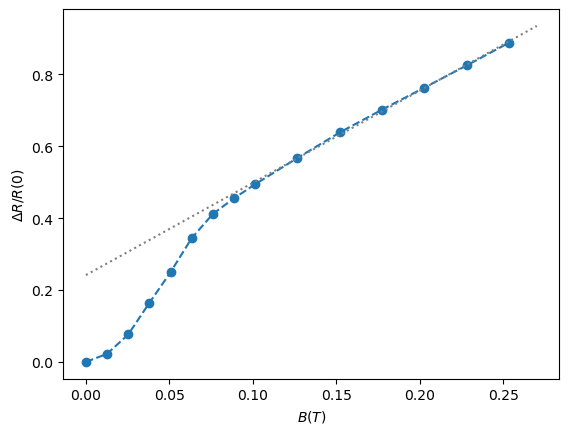

In [5]:
part4 = pd.read_csv('part4.csv')
r0 = 0.3516
r = part4['U']/1.5
dr = r - r0
drr0 = dr/ r0
drr0 = pd.concat([pd.Series([0]), drr0]).reset_index(drop=True)
b = imb * part4['Im']
b = pd.concat([pd.Series([0]), b]).reset_index(drop=True)
fig4, ax=plt.subplots()
ax.scatter(b, drr0)
ax.plot(b, drr0, '--')
blineRange = b.iloc[-7:]
drr0lineRange = drr0.iloc[-7:]
res = stats.linregress(blineRange, drr0lineRange)
xAxis = np.linspace(0,0.27)
yAxis = xAxis*res.slope + res.intercept
ax.plot(xAxis, yAxis, c='grey', ls=':')
ax.set_xlabel('$B(T)$')
ax.set_ylabel('$\Delta R / R(0)$')
plt.savefig('part4.pdf')